# Занятие 2

## Введение

Всем привет! Здесь будет материал второго занятия.

## Часть 1. Подготовка данных.

Для начала давайте импортируем все нужные нам библиотеки. Контрольный вопрос, который нужно задать себе: "Понимаю ли я, за что и какая библиотека отвечают?"

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg' 


from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Как обычно, считаем данные. Команды, отвечающие работе с таблицей в этом конспекте я уже не буду описывать столь подробно, как в предыдущем. Опять же, читая этот конспект, нужно задавать себе вопросы в духе: "Понимаю ли я, что делается в каждом инпуте?"

In [6]:
df = pd.read_excel("/Users/ivankrasnov-work/Documents/Преподавание/Хифак/Весна-2023/Data/Облака.xls")

In [7]:
df.head()

,Микроэлементы Al и Si в NaOH; La и Ce в полевом шпате,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Al,Si,La,Ce,Содержание примесей алюминия и кремния в гидро...
1,2.05,3.49,9,36.6,"Al – содержание алюминия (млн-1), Si – содержа..."
2,1.91,3.38,5.2,17.5,Содержание лантана и церия в полевом шпате:
3,1.98,3.33,10.2,25.2,"La – содержание лантана (млн-1), Ce – содержан..."
4,1.87,3.24,8,23.4,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Микроэлементы Al и Si в NaOH; La и Ce в полевом шпате  51 non-null     object
 1   Unnamed: 1                                             51 non-null     object
 2   Unnamed: 2                                             51 non-null     object
 3   Unnamed: 3                                             51 non-null     object
 4   Unnamed: 4                                             4 non-null      object
dtypes: object(5)
memory usage: 2.1+ KB


In [9]:
pd.set_option('display.max_rows', 100)

In [10]:
display(df)

,Микроэлементы Al и Si в NaOH; La и Ce в полевом шпате,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Al,Si,La,Ce,Содержание примесей алюминия и кремния в гидро...
1,2.05,3.49,9,36.6,"Al – содержание алюминия (млн-1), Si – содержа..."
2,1.91,3.38,5.2,17.5,Содержание лантана и церия в полевом шпате:
3,1.98,3.33,10.2,25.2,"La – содержание лантана (млн-1), Ce – содержан..."
4,1.87,3.24,8,23.4,NaN
5,1.91,3.3,5.1,15.4,NaN
6,1.79,3.03,5.1,12.5,NaN
7,2.03,3.42,4.8,25.3,NaN
8,1.87,3.15,7.9,16.9,NaN
9,1.98,3.43,9.2,25,NaN


In [11]:
dfControl = df.iloc[0:51, 0:4]
newHeader = dfControl.iloc[0]
dfControl = dfControl[1:]
dfControl.columns = newHeader

In [12]:
dfControl.tail()

,Al,Si,La,Ce
46,2.07,3.47,3.8,18.5
47,1.98,3.46,5.7,14.6
48,1.93,3.34,2.4,8.6
49,1.88,3.28,10.5,29.5
50,2.12,3.7,7.5,20.3


In [13]:
dfControl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Al      50 non-null     object
 1   Si      50 non-null     object
 2   La      50 non-null     object
 3   Ce      50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


Выполним замену формата данных в столбцах, но сделаем это не отдельно для каджого столбца, а в виде цикла списку столбцом фрейма `dfControl`.

In [15]:
for item in dfControl.columns:
    dfControl[item] = dfControl[item].astype('float64')

Посмотрим на описательные статистики. 

In [16]:
dfControl.describe()

,Al,Si,La,Ce
count,50.000000,50.000000,50.000000,50.000000
mean,1.976800,3.396800,6.512000,18.632000
std,0.116802,0.195442,2.951142,6.352902
min,1.680000,2.980000,2.100000,7.700000
25%,1.892500,3.252500,4.325000,14.150000
50%,1.980000,3.385000,5.900000,17.700000
75%,2.057500,3.527500,7.975000,22.900000
max,2.260000,3.880000,16.400000,36.900000


Перейдём к проверке корреляций.

## Часть 2. Корреляции.

Как вы все знаете, корреляцией (не путать с *ковариацией*) двух или более статистических признаков является "мера" их статистической зависимости. При этом причино-следственная связь не тождественна наличию связи статистической. Кроме того, напомню, что в курсе вероятности мы рассматривали примеры зависимых, но некоррелированных случайных величин -- убедитесь, что вы понимаете, о чём идёт речь.

Часто в более реальных и прикладных задачах бывает так, что признаков, данных для анализа, достаточно много, и вам нужно выделить из них несколько ключевых -- тех, по которым вы будете строить какой-то анализ. 

Вопрос вычленения главных признаков требует большого навыка и опыта, которого у нас на данный момент, разумеется, нет, но иногда бывает вполне достаточным выкинуть пары хорошо коррелированных признаков. 

Как же нам понять, есть ли корреляция между признаками? Давайте проверим это на примере двух столбцов `Al` и `Si` из нашего датафрейма.

Соберём пары ислледуемых признаков в список.

In [17]:
sampleColumns = ['Al', 'Si']

Построим диаграммы рассеяния (`scatterplot`) для данных столбцов.

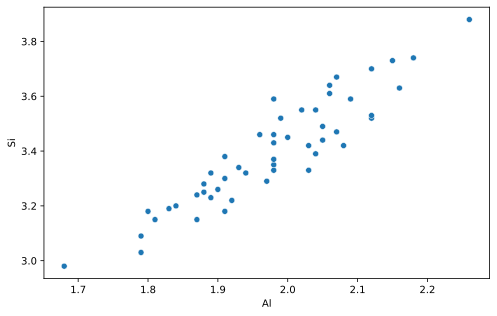

In [21]:
sns_plot = sns.scatterplot(data = dfControl[sampleColumns], x = 'Al', y = 'Si')

Что мы видим на этом графике? То. что данные сгруппированы "облачком". Такая укладка точек означает наличие корреляции данных. 

Для сравнения давайте построим диаграмму рассеяния для двух других столбцов. Что мы видим?

In [24]:
sampleColumnsAnother = ['Al', 'Ce']

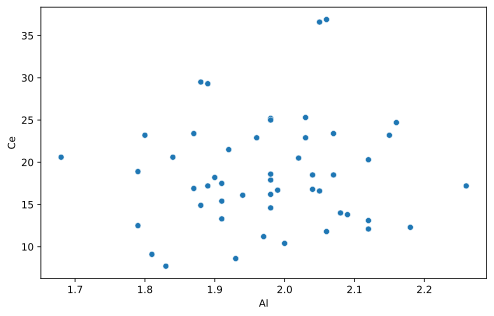

In [25]:
sns_plot = sns.scatterplot(data = dfControl[sampleColumnsAnother], x = 'Al', y = 'Ce')

Видим то, что точки разбросаны по всей плоскости, что наводит нас на мысль об отсутствии корреляции между `Al` и `Ce`.

Разумеется, могут возникать ситуации, когда не очень понятно, есть ли корреляция -- в этом случае вам может помочь линия тренда. Давайте попробуем построить линию тренда для диаграммы рассеяния `Al` и `Si`.

In [26]:
# Зададим отдельные переменные для конкретных столбцов
Al = dfControl['Al']
Si = dfControl['Si']

Теперь нам нужно построить линию тренда -- это можно сделать с помощью функции `np.polyfit(x, y, deg)`, где в качестве `x` и `y` необходимо добавить данные, по которым вы хотите построить многочлен, а в качестве `deg` указать степень этого многочлена. В нашем случае нужно указать единицу -- прямая.

In [27]:
np.polyfit(Al, Si, 1)

array([1.5443628 , 0.34390362])

Как вы можете заметить, результат выполнения команды вернулся в виде массива. При этом вы понимаете, что находится внутри -- коэффициенты прямой. Конечно, мы могли бы просто скопировать значения из массива, но давайте сделаем это более изящно.

In [28]:
z = np.polyfit(Al, Si, 1)
polynom = np.poly1d(z)
print(polynom)

 
1.544 x + 0.3439


Отлично! Мы получили уравнения прямой. А теперь давайте соберём всё на одной картинке. 

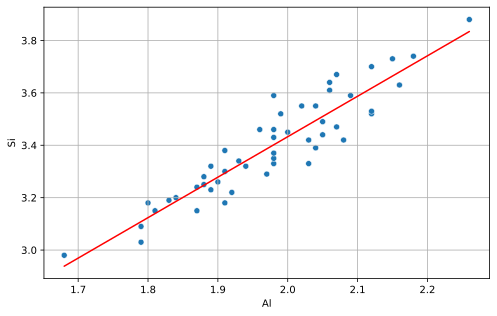

In [36]:
sns_plot = sns.scatterplot(data = dfControl[sampleColumns], x = 'Al', y = 'Si')


# В качестве аргументов `plt.plot()` нам нужно задать точки 
# и значения нашей прямой
plt.plot(Al, polynom(Al), color = 'red')

# Добавим сетку, чтобы было ещё красивее
plt.grid()

Мы построили точечную диаграмму рассеяния и линию тренда, что убеждает нас в наличии корреляции между исследуемой парой признаков. 

Проделаем ещё раз всё то же самое для пары `Al` и `Ce`.

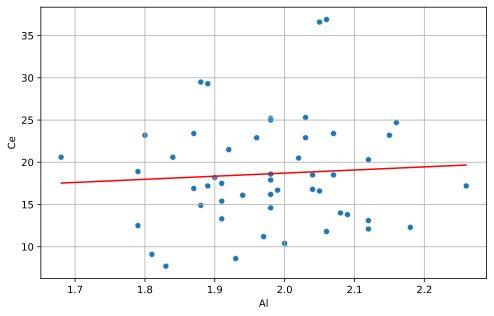

In [42]:
sns_plot = sns.scatterplot(data = dfControl[sampleColumnsAnother], x = 'Al', y = 'Ce')
Ce = dfControl['Ce']
z = np.polyfit(Al, Ce, 1)
p = np.poly1d(z)
plt.plot(Al, p(Al), color = 'red')
plt.grid()

Все данные разбросаны далеко от линии тренда. Ещё раз убедились, что корреляции нет. 

### Задача 1

а) Реализуйте функцию, которая по паре столбцов будет возвращать уравение прямой линии тренда. 

б) Реализуйте корректную обработку (как будет вести себя такая функция, если число признаков в одном и другом столбце не совпадает?)

## Часть 3. Если не верите своим глазам. 

Как вы видите, наличие или отсутствие корреляции, хорошо проверяется "на глаз". Но конечно, есть и более строгие метрики. Давайте вычислим коэффициент корреляции между вышеназванными признаками.

Для этого можно использовать метод `np.corrcoef(Al, Si)`

In [46]:
np.corrcoef(Al, Si)

array([[1.        , 0.92295263],
       [0.92295263, 1.        ]])

Что мы получили на выходе? Некоторый массив (матрицу), где на `ij`-ом месте стоит корреляция. Почему Есть две единицы? Потому что корреляция признака с самим с собой равна единице. Почему матрица симметрична? Потому что коэффициент корреляции -- симметричная функция. 

Таким образом, вычесленный нами коэффициент кореляции очень близок к единице, что ещё раз (вслед за метод пристального взгляда) подтверждает наличие корреляции между признаками.

Вычислим корреляцию для другой пары признаков, которые мы подозреваем в её отсутствии.

In [47]:
np.corrcoef(Al, Ce)

array([[1.        , 0.06763363],
       [0.06763363, 1.        ]])

Что и требовалось доказать.

Но как быть уверенным в том, что вычисленному коэффициенту можно верить? Для этого будем вычислять P-значение. Метод `scipy.stats.pearsonr()` возвращает и коээфициент корреляции, и P-значение. 

In [50]:
import scipy.stats
print(scipy.stats.pearsonr(Al, Si))

(0.9229526307710776, 1.5481515853220854e-21)


*О смысле P-значения мы поговорим отдельно на семинаре*.

Ещё один способ вычисления корреляции одного признака относительно другого, который может быть полезен

In [55]:
print(Al.corr(Si))
print(Al.corr(Si), Al.corr(Ce))

0.9229526307710769
0.9229526307710769 0.06763363371120766


## Часть 3. Пришла пора забыть всё, что было выше.

Если вы любители стрелять из пушки по воробьем, то даже в таких простых задачах, как наша, вы можете использовать следующие команды

<AxesSubplot:xlabel='0', ylabel='0'>

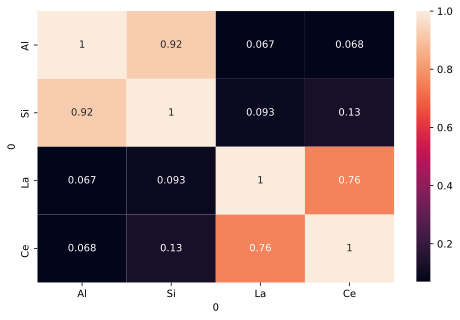

In [56]:
corrMatrix = dfControl.corr()
sns.heatmap(corrMatrix, annot = True)

Только что мы вычислили матрицу корреляций для всех признаков, а затем построили "тепловую карту". Чем выше корреляция, тем "теплее" ячейка, чем ниже, тем "холоднее".

Также не стоит забывать про `sns.pairplot()`, который строит всё, что нам нужно.

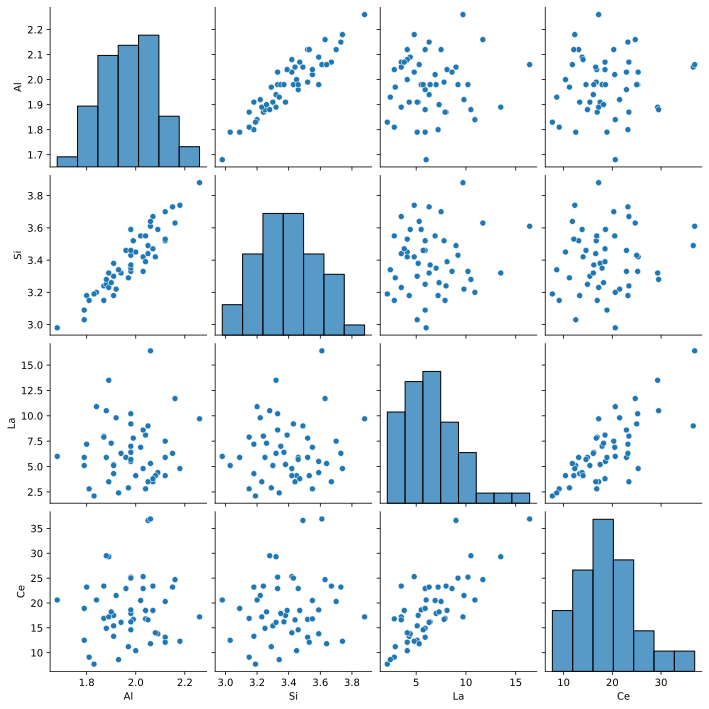

In [58]:
sns.pairplot(dfControl)

Таким образом, общий план проверки наличия корреляции выглядит следующим образом.

## Часть 4. План проверки.

* Построить картинку точек
* Построить линию тренда
* Вычислить корреляцию (Пирсона)
* Вычислить P-значение
* Если картинка кучная, линия тренда укладывается в облако, R близко к 1 (или -1), P-значение мало => коррелируют => гипотеза о независимости признаков отклоняется (т. е. признаки зависимы)

### Задача 2

Выполнить своё индивидуальное задание.